# Import packages

In [1]:
import pathlib
import urllib.request
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


/anaconda3/envs/insight3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import CSVs

## liquor data

In [146]:
liq_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/Liquor_Authority_Quarterly_List_of_Active_Licenses.csv", low_memory=False)
print(liq_data.head())
print(liq_data.columns)
liq_data.shape

   License Serial Number   License Type Name  License Class Code  \
0                1000080  GROCERY STORE BEER               122.0   
1                1000090  GROCERY STORE BEER               122.0   
2                1000099  GROCERY STORE BEER               122.0   
3                1000167  GROCERY STORE BEER               122.0   
4                1000207  GROCERY STORE BEER               122.0   

  License Type Code Agency Zone Office Name  Agency Zone Office Number  \
0                 A           New York City                          1   
1                 A           New York City                          1   
2                 A           New York City                          1   
3                 A           New York City                          1   
4                 A           New York City                          1   

  County Name (Licensee)               Premises Name  \
0                  BRONX               ERIDANIA CORP   
1                  BRONX        10

(51594, 21)

In [133]:
liq_data_mn = liq_data[liq_data['County Name (Licensee)'] == 'NEW YORK']
print(liq_data_mn.shape)
liq_data_mn.head()

(7967, 21)


,License Serial Number,License Type Name,License Class Code,License Type Code,Agency Zone Office Name,Agency Zone Office Number,County Name (Licensee),Premises Name,Doing Business As (DBA),Actual Address of Premises (Address1),...,City,State,Zip,License Certificate Number,License Original Issue Date,License Effective Date,License Expiration Date,Latitude,Longitude,Location
1457,1018839,GROCERY STORE BEER,122.0,A,New York City,1,NEW YORK,KEN HING FOOD MARKET INC,NaN,247 GRAND STREET,...,NEW YORK,NY,10002,875521,NaN,03/01/2016,02/28/2019,40.718192,-73.994203,"(40.7181920759, -73.9942025334)"
1458,1018874,GROCERY STORE BEER,122.0,A,New York City,1,NEW YORK,TIN DUC FOOD MARKET INC,NaN,129 EAST BROADWAY,...,NEW YORK,NY,10002,880174,10/10/2002,07/01/2016,06/30/2019,40.713841,-73.991994,"(40.7138405146, -73.9919940696)"
1459,1018943,GROCERY STORE BEER,122.0,A,New York City,1,NEW YORK,VESEY STREET EDIBLES INC,NaN,20 VESEY STREET,...,NEW YORK,NY,10007,883501,NaN,08/01/2016,07/31/2019,40.711755,-74.009350,"(40.7117547177, -74.0093499882)"
1460,1018970,GROCERY STORE BEER,122.0,A,New York City,1,NEW YORK,LIME TREE MARKET INC,NaN,400 E 9TH ST,...,NEW YORK,NY,10009,893285,NaN,11/01/2017,10/31/2020,40.728100,-73.984827,"(40.7281001063, -73.984826669)"
1461,1019002,"GROCERY BEER, WINE PROD",122.0,AX,New York City,1,NEW YORK,SWEET OLIVE INC,345 PRODUCE & PLUS,345 1ST AVE,...,NEW YORK,NY,10010,875230,01/06/1998,01/01/2016,12/31/2018,40.735031,-73.979935,"(40.7350311799, -73.9799349458)"


In [134]:
crosstab_liq = pd.crosstab(index=liq_data_mn["License Type Name"],  # Make a crosstab
                              columns="count") 
crosstab_liq.sort_values('count', ascending=False)


col_0,count
License Type Name,
ON-PREMISES LIQUOR,3602
RESTAURANT WINE,1405
"GROCERY BEER, WINE PROD",963
LIQUOR STORE,371
HOTEL LIQUOR,260
"DRUG CHAIN, WINE PROD",209
TAVERN WINE,195
GROCERY STORE BEER,176
EATING PLACE BEER,144


In [141]:
#restrict to bars 
liq_data_mn_bar = liq_data_mn[liq_data_mn['License Type Name'] == 'ON-PREMISES LIQUOR']
print(liq_data_mn_bar.shape)
liq_data_mn_bar_coord=liq_data_mn_bar[['Latitude', 'Longitude']]
print(liq_data_mn_bar_coord.shape)
liq_data_mn_bar_coord.head()

(3602, 21)
(3602, 2)


,Latitude,Longitude
1888,40.728855,-73.978532
1892,40.747533,-73.993211
1893,40.747557,-73.988503
1894,40.748733,-73.995877
1895,40.748794,-73.992142


## Building contact data
may be able to use this as a proxy for management company 

In [3]:
contact_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/Registration_Contacts.csv",  low_memory=False)

In [4]:
contact_data.shape

(673207, 15)

In [5]:
contact_data.head()

,RegistrationContactID,RegistrationID,Type,ContactDescription,CorporationName,Title,FirstName,MiddleInitial,LastName,BusinessHouseNumber,BusinessStreetName,BusinessApartment,BusinessCity,BusinessState,BusinessZip
0,37564010,375640,Shareholder,CONDO,NaN,NaN,FRANK,A,RACCUGLIA,423,95TH ST,OFFICE,BROOKLYN,NY,11209
1,37564013,375640,SiteManager,CONDO,NaN,NaN,GERALD,NaN,ROBINSON,NaN,NaN,NaN,NaN,NaN,NaN
2,34880202,348802,IndividualOwner,INDIV,NaN,NaN,ERIC,NaN,ORLOFSKY,93-02,95TH AVE,NaN,Ozone Park,NY,11416
3,34880204,348802,Agent,INDIV,"EBD MANAGEMENT SERVICES, LLC",NaN,ANNIKKA,NaN,MORALES,93-02,95TH AVE,NaN,Ozone Park,NY,11416
4,34880213,348802,SiteManager,INDIV,NaN,NaN,ANNIKKA,NaN,MORALES,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
contact_data.nunique()

RegistrationContactID    628326
RegistrationID           158965
Type                          9
ContactDescription          523
CorporationName           86333
Title                      3582
FirstName                 41788
MiddleInitial                49
LastName                  63460
BusinessHouseNumber       20072
BusinessStreetName        32689
BusinessApartment          5372
BusinessCity               4527
BusinessState                62
BusinessZip                3875
dtype: int64

In [7]:
#Building registration data
reg_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/Multiple_Dwelling_Registrations.csv", low_memory=False)

print(reg_data.nunique())
reg_data.head()


RegistrationID          161335
BuildingID              170308
BoroID                       5
Boro                         5
HouseNumber              20664
LowHouseNumber           20828
HighHouseNumber          20850
StreetName                4783
StreetCode                4527
Zip                        207
Block                    10550
Lot                        828
BIN                     165344
CommunityBoard              22
LastRegistrationDate      4819
RegistrationEndDate         45
dtype: int64


,RegistrationID,BuildingID,BoroID,Boro,HouseNumber,LowHouseNumber,HighHouseNumber,StreetName,StreetCode,Zip,Block,Lot,BIN,CommunityBoard,LastRegistrationDate,RegistrationEndDate
0,137263,1732,1,MANHATTAN,1325,1325,1325,3 AVENUE,10210,10021,1430,46,1044062.0,8,08/30/2017,09/01/2018
1,116249,1761,1,MANHATTAN,1406,1406,1406,3 AVENUE,10210,10075,1508,40,1047481.0,8,06/27/2017,09/01/2018
2,125581,1823,1,MANHATTAN,1562,1562,1564,3 AVENUE,10210,10128,1516,39,1048056.0,8,06/20/2017,09/01/2018
3,124445,2144,1,MANHATTAN,248,248,248,3 AVENUE,10210,10010,876,34,1017962.0,6,11/22/2014,09/01/2015
4,138408,4406,1,MANHATTAN,42,42,46,8 AVENUE,10810,10014,616,1,1011064.0,2,07/20/2017,09/01/2018


In [8]:
print(reg_data.shape)
print(reg_data.dtypes)


(170312, 16)
RegistrationID            int64
BuildingID                int64
BoroID                    int64
Boro                     object
HouseNumber              object
LowHouseNumber           object
HighHouseNumber          object
StreetName               object
StreetCode                int64
Zip                      object
Block                     int64
Lot                       int64
BIN                     float64
CommunityBoard            int64
LastRegistrationDate     object
RegistrationEndDate      object
dtype: object


In [9]:
#merge with contact data
registration_merge = pd.merge(reg_data, contact_data, how='outer',on='RegistrationID')


## Elevator data

In [10]:
ele_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/311 elevator/311_Service_Requests_from_2010_to_Present.csv", low_memory=False)


In [11]:
print(ele_data.head())
ele_data.shape

   Unique Key            Created Date             Closed Date Agency  \
0    36258691  05/23/2017 09:06:08 AM  05/23/2017 09:06:08 AM    DOB   
1    36237628  05/19/2017 03:03:15 PM  05/23/2017 12:00:00 AM    DOB   
2    36284863  05/25/2017 08:20:51 PM  06/05/2017 12:00:00 AM    DOB   
3    36284864  05/25/2017 09:28:29 PM  06/05/2017 12:00:00 AM    DOB   
4    36263324  05/23/2017 12:49:43 PM  05/23/2017 12:49:43 PM    DOB   

               Agency Name Complaint Type                        Descriptor  \
0  Department of Buildings       Elevator  Elevator - Defective/Not Working   
1  Department of Buildings       Elevator  Elevator - Defective/Not Working   
2  Department of Buildings       Elevator  Elevator - Defective/Not Working   
3  Department of Buildings       Elevator  Elevator - Defective/Not Working   
4  Department of Buildings       Elevator  Elevator - Defective/Not Working   

  Location Type  Incident Zip      Incident Address  \
0           NaN       10075.0   60 EA

(10560, 41)

In [12]:
ele_data['date'] = pd.to_datetime(ele_data['Created Date'])
ele_data['year'] = ele_data['date'].dt.year
ele_data.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date,year
0,36258691,05/23/2017 09:06:08 AM,05/23/2017 09:06:08 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10075.0,60 EAST 78 STREET,...,NaN,NaN,NaN,NaN,NaN,40.775355,-73.961977,"(40.77535549907987, -73.96197747503773)",2017-05-23 09:06:08,2017
1,36237628,05/19/2017 03:03:15 PM,05/23/2017 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10037.0,109 EAST 130 STREET,...,NaN,NaN,NaN,NaN,NaN,40.808045,-73.936279,"(40.80804488133491, -73.9362789106972)",2017-05-19 15:03:15,2017
2,36284863,05/25/2017 08:20:51 PM,06/05/2017 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10025.0,14 WEST 107 STREET,...,NaN,NaN,NaN,NaN,NaN,40.798943,-73.960097,"(40.79894309628507, -73.96009669498052)",2017-05-25 20:20:51,2017
3,36284864,05/25/2017 09:28:29 PM,06/05/2017 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10019.0,10 COLUMBUS CIRCLE,...,NaN,NaN,NaN,NaN,NaN,40.767815,-73.982260,"(40.767815119090876, -73.98225984914001)",2017-05-25 21:28:29,2017
4,36263324,05/23/2017 12:49:43 PM,05/23/2017 12:49:43 PM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10013.0,56 HUDSON STREET,...,NaN,NaN,NaN,NaN,NaN,40.717722,-74.008968,"(40.717721695674925, -74.00896802361002)",2017-05-23 12:49:43,2017


In [13]:
ele_data16 = ele_data[ele_data['year'] == 2016]
ele_data16.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date,year
204,33246794,04/30/2016 11:05:44 AM,05/04/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10009.0,635 EAST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,40.727477,-73.977519,"(40.727477465584414, -73.97751893155775)",2016-04-30 11:05:44,2016
205,33249891,04/30/2016 01:03:57 PM,05/02/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10029.0,1590 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.794050,-73.949193,"(40.79405044369122, -73.94919275426471)",2016-04-30 13:03:57,2016
207,33850329,07/14/2016 09:35:48 PM,10/28/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10037.0,650 LENOX AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.818950,-73.937309,"(40.818950225350505, -73.93730898352865)",2016-07-14 21:35:48,2016
212,34351561,09/18/2016 07:19:17 PM,11/02/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10029.0,1954 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.786252,-73.942500,"(40.78625226098017, -73.94250006874593)",2016-09-18 19:19:17,2016
213,34373410,09/21/2016 11:07:17 AM,09/26/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,10007.0,225 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,40.711870,-74.008217,"(40.71186992119673, -74.0082169606923)",2016-09-21 11:07:17,2016


In [14]:
building_w_ele16 = ele_data16.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_ele16 = building_w_ele16.rename(index=str, columns={"counts": "counts_ele_16"})
print(building_w_ele16.shape)
building_w_ele16.head()

(1395, 2)


,Incident Address,counts_ele_16
0,1 BENNETT AVENUE,1
1,1 BISTEST STREET,1
2,1 BOGARDUS PLACE,2
3,1 CENTRE STREET,2
4,1 COLUMBUS PLACE,5


In [15]:
#restrict to 2017
ele_data17 = ele_data[ele_data['year'] == 2017]
ele_data17.head()
building_w_ele17 = ele_data17.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_ele17 = building_w_ele17.rename(index=str, columns={"counts": "counts_ele_17"})
print(building_w_ele17.shape)
print(building_w_ele17.head())

#restrict to 2015
ele_data15 = ele_data[ele_data['year'] == 2015]
ele_data15.head()
building_w_ele15 = ele_data15.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_ele15 = building_w_ele15.rename(index=str, columns={"counts": "counts_ele_15"})
print(building_w_ele15.shape)
building_w_ele15.head()



(1705, 2)
   Incident Address  counts_ele_17
0     1 BANK STREET              1
1  1 BEEKMAN STREET              1
2  1 BENNETT AVENUE              2
3   1 CENTRE STREET              2
4  1 COLUMBUS PLACE              3
(1241, 2)


,Incident Address,counts_ele_15
0,1 COLUMBUS PLACE,2
1,1 ELDRIDGE STREET,1
2,1 PENN PLAZA,1
3,1 SEVENTH AVENUE,1
4,1 SICKLES STREET,2


## building footprints

In [16]:
building_data = gpd.read_file("/Users/rasmussenrogers/Documents/insight_project/Building data/Building Footprints/geo_export_12c912c5-59e9-4d99-96c5-7ca95b65f671.shp")

In [17]:
print(building_data.head())
print(building_data.dtypes)
building_data.shape

   date_lstmo    time_lstmo  heightroof  feat_code  groundelev  name  \
0  2017-12-19  00:00:00.000   21.540000     2100.0        70.0  None   
1  2017-08-17  00:00:00.000   16.381832     5110.0         6.0  None   
2  2017-08-22  00:00:00.000   26.795523     2100.0         8.0  None   
3  2017-08-17  00:00:00.000   11.358426     5110.0        29.0  None   
4  2017-08-22  00:00:00.000   26.632714     2100.0         6.0  None   

    lststatype   shape_area   shape_len  cnstrct_yr   doitt_id        bin  \
0  Constructed  1089.812313  166.785929      1993.0  1283366.0  4441987.0   
1  Constructed   329.898503   77.673856      1920.0   964744.0  4518072.0   
2  Constructed  1234.856322  146.929814      1940.0   547717.0  4299860.0   
3  Constructed   275.411758   68.476327      1930.0   861127.0  4516837.0   
4  Constructed  1420.221189  208.893121      1931.0   288652.0  4301765.0   

                                            geometry  
0  POLYGON ((-73.81023637428498 40.72623326367574

(1082932, 13)

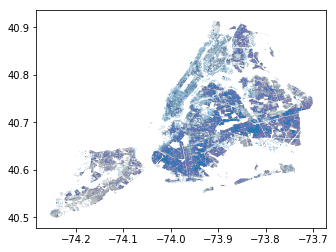

In [18]:
building_data.plot()

Address point, Certificate of occupancy data, building registration data, address data
Actually maybe i dont need these??? 

In [ ]:
#point_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/Address_Point.csv", low_memory=False)
                         

In [ ]:
#print(point_data.columns)
#print(point_data.dtypes)
#point_data.head()

In [ ]:
#cob_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/DOB_Certificate_Of_Occupancy.csv", low_memory=False)

In [ ]:
#print(cob_data.head())
#cob_data.shape

In [ ]:
Building registration data
#reg_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/Multiple_Dwelling_Registrations.csv", low_memory=False)
#print(reg_data.head())
#reg_data.shape
#reg_data.dtypes
#concatenate address
#reg_data["Address"] = reg_data['HouseNumber'].values + " " + reg_data["StreetName"].values
#reg_data['StreetName']
#reg_data.head()

In [ ]:
#add_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/pad18b/bobaadr.txt", low_memory=False)
#print(add_data.columns)
#add_data.head()
#subset to manhattan
#add_data_mn = add_data.loc[add_data['boro'] == 1]
#restrict columns
#add_data_mn_sub = add_data_mn.loc[:,['stname', 'bin', 'lhnd', 'lhns']]
#add_data_mn_sub.tail()

## Tax data 

In [19]:
tax_data = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/PLUTO17v1.1/MN2017V11.csv", low_memory=False)

In [20]:
print(tax_data.head())
print(tax_data.shape)
print(tax_data.columns)
tax_data.dtypes

  Borough  Block  Lot   CD  CT2010  CB2010  SchoolDist  Council  ZipCode  \
0      MN    372   16  103   22.02  1000.0         1.0      2.0  10009.0   
1      MN    372   17  103   22.02  1000.0         1.0      2.0  10009.0   
2      MN    372   18  103   22.02  1000.0         1.0      2.0  10009.0   
3      MN    372   19  103   22.02  1000.0         1.0      2.0  10009.0   
4      MN    372   22  103   22.02  1000.0         1.0      2.0  10009.0   

  FireComp   ...    ZMCode  Sanborn   TaxMap  EDesigNum  APPBBL APPDate  \
0     E028   ...       NaN  102 014  10202.0        NaN     0.0     NaN   
1     E028   ...       NaN  102 014  10202.0        NaN     0.0     NaN   
2     E028   ...       NaN  102 014  10202.0        NaN     0.0     NaN   
3     E028   ...       NaN  102 014  10202.0        NaN     0.0     NaN   
4     E028   ...       NaN  102 014  10202.0        NaN     0.0     NaN   

  PLUTOMapID FIRM07_Flag PFIRM15_Flag Version  
0          1         NaN          NaN  17v1.

Borough                  object
Block                     int64
Lot                       int64
CD                        int64
CT2010                  float64
CB2010                  float64
SchoolDist              float64
Council                 float64
ZipCode                 float64
FireComp                 object
PolicePrct              float64
HealthCenterDistrict    float64
HealthArea              float64
SanitBoro               float64
SanitDistrict           float64
SanitSub                 object
Address                  object
ZoneDist1                object
ZoneDist2                object
ZoneDist3                object
ZoneDist4                object
Overlay1                 object
Overlay2                 object
SPDist1                  object
SPDist2                  object
SPDist3                 float64
LtdHeight                object
SplitZone                object
BldgClass                object
LandUse                 float64
                         ...   
AssessLa

In [21]:
tax_data_sub = tax_data.loc[:,['Address', 'Borough', 'UnitsRes', 'CT2010', 'OwnerType', 'OwnerName', 'LotFront', 'NumFloors', 'BldgArea', 'YearBuilt', 'ResArea', 'BldgClass']]


In [22]:
#example of an address
tax_data_sub.iloc[0]['Address']


'286 EAST 3 STREET'

In [25]:
#resrict to manhataan
tax_data_mn = tax_data_sub.loc[tax_data_sub['Borough'] == "MN"]
print("number of all buildings in manhattan:", tax_data_mn.shape)
print(type(tax_data_mn))
#restrict to residential types: C, D
#see: https://www.propertyshark.com/mason/text/nyc_building_class.html
#first, drop missings building code
tax_data_mn = tax_data_mn.dropna(subset = ['BldgClass'])
tax_data_mn.describe(include='all')
tax_data_mn = tax_data_mn[tax_data_mn['BldgClass'].str.contains("C|D")]
print("number of residential buildings in manhattan:", tax_data_mn.shape)
#next, only select buildings with 1 or more UnitsRes
tax_data_mn = tax_data_mn.loc[tax_data_mn['UnitsRes'] >=1]
print("number of residential buildings in manhattan with at least 1 unit:", tax_data_mn.shape)

tax_data_mn = tax_data_mn.drop_duplicates(subset=['Address'], keep=False)

print("number of residential buildings in manhattan with at least 1 unit, drop duplicates:", tax_data_mn.shape)

tax_data_mn.nunique()



number of all buildings in manhattan: (43044, 12)
<class 'pandas.core.frame.DataFrame'>
number of residential buildings in manhattan: (22186, 12)
number of residential buildings in manhattan with at least 1 unit: (22025, 12)
number of residential buildings in manhattan with at least 1 unit, drop duplicates: (22007, 12)


Address      22007
Borough          1
UnitsRes       495
CT2010         281
OwnerType        5
OwnerName    18253
LotFront      1879
NumFloors       84
BldgArea     11963
YearBuilt      151
ResArea      11983
BldgClass       21
dtype: int64

In [26]:
crosstab = pd.crosstab(index=tax_data_mn["BldgClass"],  # Make a crosstab
                              columns="count") 
crosstab

col_0,count
BldgClass,
C0,1481
C1,2559
C2,606
C3,772
C4,2406
C5,2029
C6,1493
C7,4511
C8,11


In [27]:
tax_data_coord = tax_data.loc[:,['XCoord', 'YCoord', 'Address']]
tax_data_coord = tax_data_coord.drop_duplicates(subset=['Address'])

building_merge_data = pd.merge(tax_data_mn, tax_data_coord, how='inner',on='Address')
print(building_merge_data.shape)
building_merge_data.describe(include='all')




(22007, 14)


,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,ResArea,BldgClass,XCoord,YCoord
count,22007,22007,22007.000000,22007.000000,9114,21981,22007.000000,22007.000000,2.200700e+04,22007.000000,2.200700e+04,22007,2.190500e+04,21905.000000
unique,22007,1,NaN,NaN,5,18253,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN
top,179 WAVERLY PLACE,MN,NaN,NaN,P,NYC HOUSING AUTHORITY,NaN,NaN,NaN,NaN,NaN,C7,NaN,NaN
freq,1,22007,NaN,NaN,8521,160,NaN,NaN,NaN,NaN,NaN,4511,NaN,NaN
mean,NaN,NaN,34.318217,145.689856,NaN,NaN,48.605286,6.168159,3.418175e+04,1913.685645,3.181560e+04,NaN,9.934125e+05,222670.017348
std,NaN,NaN,115.607512,75.314281,NaN,NaN,57.510262,4.973356,1.156208e+05,103.857504,1.061045e+05,NaN,6.281748e+03,14236.137852
min,NaN,NaN,2.000000,2.010000,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,9.792140e+05,195970.000000
25%,NaN,NaN,8.000000,77.000000,NaN,NaN,22.000000,4.000000,6.314000e+03,1901.000000,5.840000e+03,NaN,9.881200e+05,209581.000000
50%,NaN,NaN,15.000000,154.000000,NaN,NaN,25.170000,5.000000,1.000000e+04,1910.000000,9.385000e+03,NaN,9.936940e+05,223113.000000
75%,NaN,NaN,28.000000,208.000000,NaN,NaN,50.000000,6.000000,2.259600e+04,1922.000000,2.117900e+04,NaN,9.989030e+05,232781.000000


In [28]:
#tax data only gives x and y coords
#convert to lat long
import pyproj

NYSP1983 = pyproj.Proj(init="ESRI:102718", preserve_units=True)


#long = np.array((building_merge_data.shape[0],1))
#lat = np.array((building_merge_data.shape[0],1))
coordslist=[]
for i,row in enumerate(building_merge_data.iterrows()):
    xcoord=row[1]['XCoord']
    ycoord=row[1]['YCoord']
    coordslist.append(NYSP1983(xcoord,ycoord,inverse=True))

    
coords_df = pd.DataFrame(coordslist)
print(coords_df)




               0          1
0     -73.980050  40.721179
1     -73.979967  40.721146
2     -73.979895  40.721113
3     -73.979823  40.721083
4     -73.979610  40.720995
5     -73.979538  40.720964
6     -73.979430  40.720918
7     -73.979217  40.720830
8     -73.979040  40.720753
9     -73.978925  40.720693
10    -73.978654  40.720525
11    -73.978856  40.720352
12    -73.979257  40.720503
13    -73.979534  40.720621
14    -73.979697  40.720687
15    -73.979942  40.720794
16    -73.980551  40.721042
17    -73.979786  40.721879
18    -73.979512  40.721763
19    -73.979447  40.721733
20    -73.979299  40.721673
21    -73.979227  40.721642
22    -73.979051  40.721566
23    -73.978906  40.721505
24    -73.978730  40.721431
25    -73.978142  40.721280
26    -73.978145  40.721167
27    -73.978423  40.720893
28    -73.978621  40.721077
29    -73.978798  40.721151
...          ...        ...
21977 -73.926941  40.867720
21978 -73.926858  40.867391
21979 -73.927234  40.867119
21980 -73.927603  40

In [29]:
building_merge_data_coord = pd.concat([building_merge_data, coords_df], axis=1)
print(building_merge_data_coord.shape)
building_merge_data_coord = building_merge_data_coord.rename(index=str, columns={0: "lon", 1: "lat"})
building_merge_data_coord.head()

(22007, 16)


,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,ResArea,BldgClass,XCoord,YCoord,lon,lat
0,286 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.42,6.0,29940,2005,29940,D1,989780.0,202022.0,-73.980050,40.721179
1,288 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.75,6.0,18550,2005,18550,D1,989803.0,202010.0,-73.979967,40.721146
2,290 EAST 3 STREET,MN,53,22.02,P,HENRY STREET SETTLEM,22.33,6.0,37767,2005,29940,D1,989823.0,201998.0,-73.979895,40.721113
3,292 EAST 3 STREET,MN,9,22.02,P,BULLET SPACE HOUSING,22.67,5.0,6920,1920,6420,C7,989843.0,201987.0,-73.979823,40.721083
4,298 EAST 3 STREET,MN,9,22.02,NaN,298 E 3 CP,22.58,5.0,8850,1923,7965,C6,989902.0,201955.0,-73.979610,40.720995


## Census data

In [30]:
states_filename = "tl_2017_us_state.zip"
states_url = f"https://www2.census.gov/geo/tiger/TIGER2017/STATE/{states_filename}"
states_file = pathlib.Path(states_filename)

tract_filename = "tl_2017_36_tract.zip"
tract_url = f"https://www2.census.gov/geo/tiger/TIGER2017/TRACT/{tract_filename}"
tract_file = pathlib.Path(tract_filename)

for data_file, url in zip([states_file, tract_file], [states_url, tract_url]):
    if not data_file.is_file():
        with urllib.request.urlopen(url) as resp, \
                open(data_file, "wb") as f:

            f.write(resp.read())
            



In [31]:
###import state and census tract data

states_gdf = gpd.read_file(f"zip://{states_file}")

tract_gdf = gpd.read_file(f"zip://{tract_file}")



In [32]:
#look at census tract data
tract_gdf.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,093,033102,36093033102,331.02,Census Tract 331.02,G5020,S,183329957,3232878,+42.7780137,-074.1727137,"POLYGON ((-74.30655 42.750642, -74.30624499999..."
1,36,093,020102,36093020102,201.02,Census Tract 201.02,G5020,S,854904,0,+42.8295375,-073.9161408,"POLYGON ((-73.92513099999999 42.82029, -73.924..."
2,36,093,032504,36093032504,325.04,Census Tract 325.04,G5020,S,65998560,1265253,+42.9010539,-074.0288936,"POLYGON ((-74.09298 42.955868, -74.08805199999..."
3,36,081,003400,36081003400,34,Census Tract 34,G5020,S,213987,0,+40.6847731,-073.8581871,"POLYGON ((-73.86629499999999 40.683189, -73.86..."
4,36,081,003900,36081003900,39,Census Tract 39,G5020,S,146970,0,+40.7627994,-073.9409316,"POLYGON ((-73.943304 40.760658, -73.942472 40...."


In [33]:
#projection of census tract data
tract_gdf.crs


{'init': 'epsg:4269'}

In [34]:
#restrict to manhattan
counties = ['061']
nyc=tract_gdf.loc[tract_gdf['COUNTYFP'].isin(counties)]
nyc.head()
nyc.shape


(288, 13)

In [35]:
#data types
tract_gdf.dtypes


STATEFP     object
COUNTYFP    object
TRACTCE     object
GEOID       object
NAME        object
NAMELSAD    object
MTFCC       object
FUNCSTAT    object
ALAND        int64
AWATER       int64
INTPTLAT    object
INTPTLON    object
geometry    object
dtype: object

In [231]:
#look at data
nyc.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
index_right,,,,,,,,,,,,,
727,36,061,023400,36061023400,234,Census Tract 234,G5020,S,108235,0,+40.8237305,-073.9386702,"POLYGON ((-73.94097099999999 40.824132, -73.94..."
728,36,061,023501,36061023501,235.01,Census Tract 235.01,G5020,S,179045,0,+40.8289967,-073.9418352,"POLYGON ((-73.944835 40.829023, -73.94438 40.8..."
729,36,061,023502,36061023502,235.02,Census Tract 235.02,G5020,S,41338,0,+40.8278881,-073.9389277,"POLYGON ((-73.94014 40.827039, -73.93969 40.82..."
730,36,061,023600,36061023600,236,Census Tract 236,G5020,S,263158,127979,+40.8242944,-073.9356565,"POLYGON ((-73.93960199999999 40.826002, -73.93..."
731,36,061,023700,36061023700,237,Census Tract 237,G5020,S,271911,273621,+40.8343381,-073.9551977,"POLYGON ((-73.958608 40.837381, -73.9504029999..."


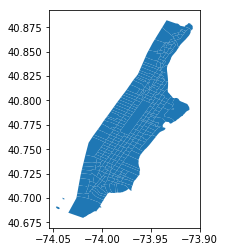

In [37]:
#plot manhattan data
nyc.plot()



In [38]:
import pandas
import geopandas
import geopandas.tools
from shapely.geometry import Point



In [39]:
places = building_merge_data_coord.loc[:,['lat', 'lon', 'Address']]


In [232]:
places["geometry"] = places.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
places.head()
places.crs = {"init": "epsg:4269"}
census = nyc[["TRACTCE", "ALAND", "geometry"]]


In [233]:
building_tract = geopandas.tools.sjoin(places, census, how="left")



In [234]:
building_tract.head()


,lat,lon,Address,geometry,index_right,TRACTCE,ALAND
0,40.721179,-73.980050,286 EAST 3 STREET,POINT (-73.98004998256006 40.72117867373973),3946.0,002202,56112.0
1,40.721146,-73.979967,288 EAST 3 STREET,POINT (-73.97996701770731 40.72114572222888),3946.0,002202,56112.0
2,40.721113,-73.979895,290 EAST 3 STREET,POINT (-73.97989487571978 40.72111277254854),3946.0,002202,56112.0
3,40.721083,-73.979823,292 EAST 3 STREET,POINT (-73.97982273297264 40.72108256758146),3946.0,002202,56112.0
4,40.720995,-73.979610,298 EAST 3 STREET,POINT (-73.97960991187161 40.72099469780596),3946.0,002202,56112.0


In [43]:
building_tract.shape

(22007, 6)

In [235]:
#merge back with building dataset    
building_merge2 = pd.merge(building_merge_data_coord, building_tract, how='inner',on='Address')
building_merge2.head()

,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,...,XCoord,YCoord,lon_x,lat_x,lat_y,lon_y,geometry,index_right,TRACTCE,ALAND
0,286 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.42,6.0,29940,2005,...,989780.0,202022.0,-73.980050,40.721179,40.721179,-73.980050,POINT (-73.98004998256006 40.72117867373973),3946.0,002202,56112.0
1,288 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.75,6.0,18550,2005,...,989803.0,202010.0,-73.979967,40.721146,40.721146,-73.979967,POINT (-73.97996701770731 40.72114572222888),3946.0,002202,56112.0
2,290 EAST 3 STREET,MN,53,22.02,P,HENRY STREET SETTLEM,22.33,6.0,37767,2005,...,989823.0,201998.0,-73.979895,40.721113,40.721113,-73.979895,POINT (-73.97989487571978 40.72111277254854),3946.0,002202,56112.0
3,292 EAST 3 STREET,MN,9,22.02,P,BULLET SPACE HOUSING,22.67,5.0,6920,1920,...,989843.0,201987.0,-73.979823,40.721083,40.721083,-73.979823,POINT (-73.97982273297264 40.72108256758146),3946.0,002202,56112.0
4,298 EAST 3 STREET,MN,9,22.02,NaN,298 E 3 CP,22.58,5.0,8850,1923,...,989902.0,201955.0,-73.979610,40.720995,40.720995,-73.979610,POINT (-73.97960991187161 40.72099469780596),3946.0,002202,56112.0


import variables from census api 

In [45]:
from census import Census
from us import states

c = Census("a513b11c3aa6b2677d078ad85435114229899fa3")

census_16a = c.acs5.state_county_tract(("B01001_001E", "B01001_002E", "B01001_003E", "B01001_004E",
      "B01001_005E", "B01001_006E", "B01001_007E", "B01001_008E", "B01001_009E", "B01001_010E",
      "B01001_011E", "B01001_012E", "B01001_013E", "B01001_014E", "B01001_015E", "B01001_016E", 
      "B01001_017E", "B01001_018E", "B01001_019E", "B01001_020E", "B01001_021E", "B01001_022E", 
      "B01001_023E", "B01001_024E", "B01001_025E", "B01001_026E", "B01001_027E", "B01001_028E"), states.NY.fips, '061', Census.ALL)
census_16a = pd.DataFrame(census_16a)
census_16a.head()




,B01001_001E,B01001_002E,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,...,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_026E,B01001_027E,B01001_028E,county,state,tract
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36,000100
1,2670,1170.0,0.0,124.0,29.0,15.0,41.0,31.0,30.0,54.0,...,40.0,56.0,61.0,16.0,1500.0,86.0,62.0,061,36,000201
2,8016,3349.0,107.0,152.0,268.0,106.0,86.0,28.0,27.0,54.0,...,231.0,146.0,83.0,92.0,4667.0,250.0,174.0,061,36,000202
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36,000500
4,10765,5104.0,210.0,304.0,63.0,193.0,142.0,0.0,32.0,192.0,...,205.0,177.0,368.0,360.0,5661.0,415.0,185.0,061,36,000600


In [222]:
census_16b = c.acs5.state_county_tract(( "B01001_029E", "B01001_030E", "B01001_031E", "B01001_032E", "B01001_033E", "B01001_034E", 
      "B01001_035E", "B01001_036E", "B01001_037E", "B01001_038E", "B01001_039E", "B01001_040E", 
      "B01001_041E", "B01001_042E", "B01001_043E", "B01001_044E", "B01001_045E", "B01001_046E", 
      "B01001_047E", "B01001_048E", "B01001_049E", "B25003_002E", "B25003_003E","B25014_008E", 
      "B25014_002E", "B25014_009E", "B25014_010E", "B25014_011E", "B25014_012E", "B25014_013E"), states.NY.fips, '061', Census.ALL)
census_16b = pd.DataFrame(census_16b)
census_16b.head()


,B01001_029E,B01001_030E,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,...,B25014_002E,B25014_008E,B25014_009E,B25014_010E,B25014_011E,B25014_012E,B25014_013E,county,state,tract
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36,000100
1,26.0,0.0,110.0,7.0,0.0,122.0,146.0,92.0,25.0,116.0,...,5.0,973.0,494.0,333.0,113.0,21.0,12.0,061,36,000201
2,324.0,112.0,128.0,71.0,22.0,106.0,368.0,370.0,415.0,185.0,...,787.0,2754.0,1438.0,1269.0,47.0,0.0,0.0,061,36,000202
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36,000500
4,327.0,226.0,31.0,36.0,0.0,125.0,482.0,269.0,138.0,104.0,...,167.0,3994.0,1794.0,1998.0,103.0,99.0,0.0,061,36,000600


In [223]:
census_16 = pd.merge(census_16a, census_16b, on='tract')
print(census_16.columns)
census_16.head()

Index(['B01001_001E', 'B01001_002E', 'B01001_003E', 'B01001_004E',
       'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_008E',
       'B01001_009E', 'B01001_010E', 'B01001_011E', 'B01001_012E',
       'B01001_013E', 'B01001_014E', 'B01001_015E', 'B01001_016E',
       'B01001_017E', 'B01001_018E', 'B01001_019E', 'B01001_020E',
       'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E',
       'B01001_025E', 'B01001_026E', 'B01001_027E', 'B01001_028E', 'county_x',
       'state_x', 'tract', 'B01001_029E', 'B01001_030E', 'B01001_031E',
       'B01001_032E', 'B01001_033E', 'B01001_034E', 'B01001_035E',
       'B01001_036E', 'B01001_037E', 'B01001_038E', 'B01001_039E',
       'B01001_040E', 'B01001_041E', 'B01001_042E', 'B01001_043E',
       'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E',
       'B01001_048E', 'B01001_049E', 'B25003_002E', 'B25003_003E',
       'B25014_002E', 'B25014_008E', 'B25014_009E', 'B25014_010E',
       'B25014_011E', 'B25014_012E', 'B25014_

,B01001_001E,B01001_002E,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,...,B25003_003E,B25014_002E,B25014_008E,B25014_009E,B25014_010E,B25014_011E,B25014_012E,B25014_013E,county_y,state_y
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36
1,2670,1170.0,0.0,124.0,29.0,15.0,41.0,31.0,30.0,54.0,...,973.0,5.0,973.0,494.0,333.0,113.0,21.0,12.0,061,36
2,8016,3349.0,107.0,152.0,268.0,106.0,86.0,28.0,27.0,54.0,...,2754.0,787.0,2754.0,1438.0,1269.0,47.0,0.0,0.0,061,36
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36
4,10765,5104.0,210.0,304.0,63.0,193.0,142.0,0.0,32.0,192.0,...,3994.0,167.0,3994.0,1794.0,1998.0,103.0,99.0,0.0,061,36


In [48]:
census_16.columns = ['est_total', 'est_total_male', 'est_total_male_5', 'est_total_male_9', 'est_total_male_14', 'est_total_male_17',
             'est_total_male_19', 'est_total_male_20', 'est_total_male_21', 'est_total_male_24', 'est_total_male_29', 'est_total_male_34',
             'est_total_male_39', 'est_total_male_44', 'est_total_male_49', 'est_total_male_54', 'est_total_male_59', 'est_total_male_61',
             'est_total_male_64', 'est_total_male_66', 'est_total_male_69', 'est_total_male_74', 'est_total_male_79', 'est_total_male_84',
             'est_total_male_85', 'est_total_female', 'est_total_female_5', 'est_total_female_9','county_x',
            'state_x', 'tract', 'est_total_female_14', 'est_total_female_17',
             'est_total_female_19', 'est_total_female_20', 'est_total_female_21', 'est_total_female_24', 'est_total_female_29', 'est_total_female_34',
             'est_total_female_39', 'est_total_female_44', 'est_total_female_49', 'est_total_female_54', 'est_total_female_59', 'est_total_female_61',
             'est_total_female_64', 'est_total_female_66', 'est_total_female_69', 'est_total_female_74', 'est_total_female_79', 'est_total_female_84',
             'est_total_female_85', 'owner_occ', 'renter_occ', 'renter_occ_b', 'owner_occ_b', 'renter_occ_5_room', 'renter_occ_1_room', 
                    'renter_occ_15_room', 'renter_occ_2_room', 'renter_occ_25_room', 'county_y', 'state_y']
census_16.head()

,est_total,est_total_male,est_total_male_5,est_total_male_9,est_total_male_14,est_total_male_17,est_total_male_19,est_total_male_20,est_total_male_21,est_total_male_24,...,renter_occ,renter_occ_b,owner_occ_b,renter_occ_5_room,renter_occ_1_room,renter_occ_15_room,renter_occ_2_room,renter_occ_25_room,county_y,state_y
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36
1,2670,1170.0,0.0,124.0,29.0,15.0,41.0,31.0,30.0,54.0,...,973.0,5.0,973.0,494.0,333.0,113.0,21.0,12.0,061,36
2,8016,3349.0,107.0,152.0,268.0,106.0,86.0,28.0,27.0,54.0,...,2754.0,787.0,2754.0,1438.0,1269.0,47.0,0.0,0.0,061,36
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,061,36
4,10765,5104.0,210.0,304.0,63.0,193.0,142.0,0.0,32.0,192.0,...,3994.0,167.0,3994.0,1794.0,1998.0,103.0,99.0,0.0,061,36


In [49]:
building_tract_var = pd.merge(building_tract, census_16, how='left', left_on='TRACTCE', right_on='tract')
print(building_tract_var.shape)


(22007, 69)


# 311 heat hot water data

In [50]:
data_heat = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/311 heat/311_Service_Requests_from_2010_to_Present.csv", low_memory=False)
print(data_heat.columns)
data_heat.head()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,29625204,01/02/2015 12:00:00 AM,01/06/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11237.0,348 MELROSE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.703602,-73.928112,"(40.70360249602949, -73.92811230587246)"
1,29625202,01/02/2015 12:00:00 AM,01/06/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10452.0,1165 GERARD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.834530,-73.920826,"(40.83453007332443, -73.92082646479665)"
2,29625198,01/02/2015 12:00:00 AM,01/05/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10040.0,92 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.860524,-73.927690,"(40.860524203689714, -73.92768962592346)"
3,29625195,01/02/2015 12:00:00 AM,01/07/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10031.0,715 RIVERSIDE DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829485,-73.950091,"(40.82948519917029, -73.95009074511785)"
4,29625193,01/02/2015 12:00:00 AM,01/12/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10034.0,184 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.861842,-73.924087,"(40.861842090450736, -73.92408742418567)"


In [51]:
#create year variable
import datetime
data_heat['date'] = pd.to_datetime(data_heat['Created Date'])
data_heat['year'] = data_heat['date'].dt.year
print(data_heat.dtypes)
data_heat.head()


Unique Key                                 int64
Created Date                              object
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                    float64
Intersection Street 2                    float64
Address Type                              object
City                                      object
Landmark                                 float64
Facility Type                            float64
Status                                    object
Due Date            

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date,year
0,29625204,01/02/2015 12:00:00 AM,01/06/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11237.0,348 MELROSE STREET,...,NaN,NaN,NaN,NaN,NaN,40.703602,-73.928112,"(40.70360249602949, -73.92811230587246)",2015-01-02,2015
1,29625202,01/02/2015 12:00:00 AM,01/06/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10452.0,1165 GERARD AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.834530,-73.920826,"(40.83453007332443, -73.92082646479665)",2015-01-02,2015
2,29625198,01/02/2015 12:00:00 AM,01/05/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10040.0,92 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.860524,-73.927690,"(40.860524203689714, -73.92768962592346)",2015-01-02,2015
3,29625195,01/02/2015 12:00:00 AM,01/07/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10031.0,715 RIVERSIDE DRIVE,...,NaN,NaN,NaN,NaN,NaN,40.829485,-73.950091,"(40.82948519917029, -73.95009074511785)",2015-01-02,2015
4,29625193,01/02/2015 12:00:00 AM,01/12/2015 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10034.0,184 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.861842,-73.924087,"(40.861842090450736, -73.92408742418567)",2015-01-02,2015


In [52]:
data_heat16 = data_heat[data_heat['year'] == 2016]
building_w_heat16 = data_heat16.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_heat16 = building_w_heat16.rename(index=str, columns={"counts": "counts_heat_16"})
building_w_heat16.head()

,Incident Address,counts_heat_16
0,1 7 AVENUE,1
1,1 ADRIAN AVENUE,3
2,1 BENNETT AVENUE,15
3,1 BOGARDUS PLACE,50
4,1 BOWERY,1


In [53]:
data_heat15 = data_heat[data_heat['year'] == 2015]
building_w_heat15 = data_heat15.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_heat15 = building_w_heat15.rename(index=str, columns={"counts": "counts_heat_15"})
building_w_heat15.head()


,Incident Address,counts_heat_15
0,1 1 AVENUE,1
1,1 43 STREET,1
2,1 ADRIAN AVENUE,28
3,1 AUDUBON AVENUE,2
4,1 BENNETT AVENUE,39


In [54]:
data_heat17 = data_heat[data_heat['year'] == 2017]
building_w_heat17 = data_heat15.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_heat17 = building_w_heat17.rename(index=str, columns={"counts": "counts_heat_17"})
building_w_heat17.head()


,Incident Address,counts_heat_17
0,1 1 AVENUE,1
1,1 43 STREET,1
2,1 ADRIAN AVENUE,28
3,1 AUDUBON AVENUE,2
4,1 BENNETT AVENUE,39


## 311 noise data

In [55]:
data_noise = pd.read_csv("/Users/rasmussenrogers/Documents/insight_project/Building data/311 noise/311_Service_Requests_from_2010_to_Present.csv", low_memory=False)
data_noise_mn = data_noise[data_noise['Borough'] == "MANHATTAN"] 
type(data_noise_mn)

pandas.core.frame.DataFrame

In [56]:
print(data_noise_mn.head())
print(data_noise_mn.shape)
print(data_noise_mn.describe(include='all'))
data_noise_mn.dtypes

   Unique Key            Created Date             Closed Date Agency  \
0    36259905  05/24/2017 12:28:07 AM  05/24/2017 03:06:05 AM   NYPD   
1    36259906  05/23/2017 10:26:51 PM  05/23/2017 11:06:28 PM   NYPD   
3    36259910  05/24/2017 12:10:16 AM  05/24/2017 12:38:05 AM   NYPD   
5    36237699  05/19/2017 11:55:23 PM  05/20/2017 12:36:23 AM   NYPD   
9    36238633  05/20/2017 10:16:39 PM  05/21/2017 12:59:44 AM   NYPD   

                       Agency Name       Complaint Type        Descriptor  \
0  New York City Police Department  Noise - Residential  Banging/Pounding   
1  New York City Police Department  Noise - Residential  Banging/Pounding   
3  New York City Police Department  Noise - Residential  Banging/Pounding   
5  New York City Police Department  Noise - Residential  Loud Music/Party   
9  New York City Police Department  Noise - Residential  Loud Music/Party   

                Location Type  Incident Zip  \
0  Residential Building/House       10027.0   
1  Residen

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                          float64
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [57]:
#create year variable
import datetime
data_noise_mn['date'] = pd.to_datetime(data_noise_mn['Created Date'])
data_noise_mn['year'] = data_noise_mn['date'].dt.year
print(data_noise_mn.dtypes)
data_noise_mn.head()

/anaconda3/envs/insight3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unique Key                                 int64
Created Date                              object
Closed Date                               object
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                 float64
Facility Type                             object
Status                                    object
Due Date            

/anaconda3/envs/insight3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,date,year
0,36259905,05/24/2017 12:28:07 AM,05/24/2017 03:06:05 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10027.0,200 WEST 131 STREET,...,NaN,NaN,NaN,NaN,NaN,40.812812,-73.945739,"(40.81281181632886, -73.94573926927536)",2017-05-24 00:28:07,2017
1,36259906,05/23/2017 10:26:51 PM,05/23/2017 11:06:28 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10035.0,1674 PARK AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.800470,-73.942387,"(40.80046990784038, -73.9423866544713)",2017-05-23 22:26:51,2017
3,36259910,05/24/2017 12:10:16 AM,05/24/2017 12:38:05 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10010.0,510 EAST 23 STREET,...,NaN,NaN,NaN,NaN,NaN,40.735783,-73.976181,"(40.73578282484207, -73.97618102549775)",2017-05-24 00:10:16,2017
5,36237699,05/19/2017 11:55:23 PM,05/20/2017 12:36:23 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10029.0,EAST 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-19 23:55:23,2017
9,36238633,05/20/2017 10:16:39 PM,05/21/2017 12:59:44 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10039.0,2971 FREDERICK DOUGLASS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,40.830362,-73.936402,"(40.830362260625506, -73.93640207830494)",2017-05-20 22:16:39,2017


In [58]:
data_noise16 = data_noise_mn[data_noise_mn['year'] == 2016]
print(data_noise16.shape)

building_w_noise16 = data_noise16.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_noise16 = building_w_noise16.rename(index=str, columns={"counts": "counts_noise_16"})
print(building_w_noise16.shape)
building_w_noise16 = building_w_noise16.rename(index=str, columns={"counts": "counts_noise_16"})

building_w_noise16.head()


(49805, 43)
(10775, 2)


,Incident Address,counts_noise_16
0,1 ADRIAN AVENUE,4
1,1 ARDEN STREET,15
2,1 ASTOR PLACE,5
3,1 AUDUBON AVENUE,4
4,1 AVENUE,3


In [59]:
data_noise15 = data_noise_mn[data_noise_mn['year'] == 2015]
print(data_noise15.shape)

building_w_noise15 = data_noise15.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_noise15 = building_w_noise15.rename(index=str, columns={"counts": "counts_noise_15"})
print(building_w_noise15.shape)
building_w_noise15 = building_w_noise15.rename(index=str, columns={"counts": "counts_noise_15"})

building_w_noise15.head()


(46913, 43)
(10774, 2)


,Incident Address,counts_noise_15
0,1 ADRIAN AVENUE,3
1,1 ARDEN STREET,16
2,1 ASTOR PLACE,2
3,1 AUDUBON AVENUE,1
4,1 AVENUE,3


In [60]:
data_noise17 = data_noise_mn[data_noise_mn['year'] == 2017]
print(data_noise17.shape)

building_w_noise17 = data_noise17.groupby(['Incident Address']).size().reset_index(name='counts')
building_w_noise17 = building_w_noise17.rename(index=str, columns={"counts": "counts_noise_17"})
print(building_w_noise17.shape)
building_w_noise17 = building_w_noise17.rename(index=str, columns={"counts": "counts_noise_17"})

building_w_noise17.head()


(50814, 43)
(10932, 2)


,Incident Address,counts_noise_17
0,1 ADRIAN AVENUE,6
1,1 ARDEN STREET,9
2,1 AUDOBON AVENUE,1
3,1 AUDUBON AVENUE,2
4,1 AVENUE,2


In [61]:
print(building_w_noise16.shape)
print(building_w_noise15.shape)
data_311_noise_15_16 = pd.merge(building_w_noise15, building_w_noise16, how='outer', on='Incident Address')
data_311_noise_15_16.head()

(10775, 2)
(10774, 2)


,Incident Address,counts_noise_15,counts_noise_16
0,1 ADRIAN AVENUE,3.0,4.0
1,1 ARDEN STREET,16.0,15.0
2,1 ASTOR PLACE,2.0,5.0
3,1 AUDUBON AVENUE,1.0,4.0
4,1 AVENUE,3.0,3.0


In [62]:
data_311_noise = pd.merge(data_311_noise_15_16, building_w_noise17, how='outer', on='Incident Address')
data_311_noise.head()

,Incident Address,counts_noise_15,counts_noise_16,counts_noise_17
0,1 ADRIAN AVENUE,3.0,4.0,6.0
1,1 ARDEN STREET,16.0,15.0,9.0
2,1 ASTOR PLACE,2.0,5.0,NaN
3,1 AUDUBON AVENUE,1.0,4.0,2.0
4,1 AVENUE,3.0,3.0,2.0


In [63]:
data_311_heat_15_16 = pd.merge(building_w_heat15, building_w_heat16, how='outer', on='Incident Address')
data_311_heat_15_16.head()

,Incident Address,counts_heat_15,counts_heat_16
0,1 1 AVENUE,1.0,NaN
1,1 43 STREET,1.0,NaN
2,1 ADRIAN AVENUE,28.0,3.0
3,1 AUDUBON AVENUE,2.0,NaN
4,1 BENNETT AVENUE,39.0,15.0


In [64]:
data_311_heat = pd.merge(data_311_heat_15_16, building_w_heat17, how='outer', on='Incident Address')
data_311_heat.head()

,Incident Address,counts_heat_15,counts_heat_16,counts_heat_17
0,1 1 AVENUE,1.0,NaN,1.0
1,1 43 STREET,1.0,NaN,1.0
2,1 ADRIAN AVENUE,28.0,3.0,28.0
3,1 AUDUBON AVENUE,2.0,NaN,2.0
4,1 BENNETT AVENUE,39.0,15.0,39.0


In [65]:
data_311 = pd.merge(data_311_heat, data_311_noise, how='outer', on='Incident Address')
print(data_311.shape)
data_311.head()

(73733, 7)


,Incident Address,counts_heat_15,counts_heat_16,counts_heat_17,counts_noise_15,counts_noise_16,counts_noise_17
0,1 1 AVENUE,1.0,NaN,1.0,NaN,NaN,NaN
1,1 43 STREET,1.0,NaN,1.0,NaN,NaN,NaN
2,1 ADRIAN AVENUE,28.0,3.0,28.0,3.0,4.0,6.0
3,1 AUDUBON AVENUE,2.0,NaN,2.0,1.0,4.0,2.0
4,1 BENNETT AVENUE,39.0,15.0,39.0,3.0,6.0,1.0


In [66]:
#merge elevator data
data_ele_15_16 = pd.merge(building_w_ele15, building_w_ele16, how='outer', on='Incident Address')
data_ele = pd.merge(data_ele_15_16, building_w_ele17, how='outer', on='Incident Address')
print(data_ele.shape)
data_ele.head()


(3299, 4)


,Incident Address,counts_ele_15,counts_ele_16,counts_ele_17
0,1 COLUMBUS PLACE,2.0,5.0,3.0
1,1 ELDRIDGE STREET,1.0,NaN,NaN
2,1 PENN PLAZA,1.0,NaN,NaN
3,1 SEVENTH AVENUE,1.0,NaN,NaN
4,1 SICKLES STREET,2.0,4.0,4.0


In [67]:
#merge elevator and noise and heat data
print(data_ele.shape)
print(data_311.shape)
print(data_ele.columns)
print(data_311.columns)

outcome_data = pd.merge(data_ele, data_311, how='outer', on='Incident Address')
print(outcome_data.shape)
outcome_data.head()


(3299, 4)
(73733, 7)
Index(['Incident Address', 'counts_ele_15', 'counts_ele_16', 'counts_ele_17'], dtype='object')
Index(['Incident Address', 'counts_heat_15', 'counts_heat_16',
       'counts_heat_17', 'counts_noise_15', 'counts_noise_16',
       'counts_noise_17'],
      dtype='object')
(75377, 10)


,Incident Address,counts_ele_15,counts_ele_16,counts_ele_17,counts_heat_15,counts_heat_16,counts_heat_17,counts_noise_15,counts_noise_16,counts_noise_17
0,1 COLUMBUS PLACE,2.0,5.0,3.0,NaN,1.0,NaN,NaN,2.0,2.0
1,1 ELDRIDGE STREET,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 PENN PLAZA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,1 SEVENTH AVENUE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 SICKLES STREET,2.0,4.0,4.0,1.0,19.0,1.0,18.0,36.0,40.0


## combine outcome data with building data

In [236]:
outcome_data = outcome_data.rename(index=str, columns={"Incident Address": "Address"})
print(outcome_data.shape)
print(building_merge2.shape)
building_merge3 = pd.merge(building_merge2, outcome_data, how='left', on='Address')
building_merge3.shape


(75377, 10)
(22007, 22)


(22007, 31)

In [237]:
print(building_merge3.columns)
building_merge3.head()


Index(['Address', 'Borough', 'UnitsRes', 'CT2010', 'OwnerType', 'OwnerName',
       'LotFront', 'NumFloors', 'BldgArea', 'YearBuilt', 'ResArea',
       'BldgClass', 'XCoord', 'YCoord', 'lon_x', 'lat_x', 'lat_y', 'lon_y',
       'geometry', 'index_right', 'TRACTCE', 'ALAND', 'counts_ele_15',
       'counts_ele_16', 'counts_ele_17', 'counts_heat_15', 'counts_heat_16',
       'counts_heat_17', 'counts_noise_15', 'counts_noise_16',
       'counts_noise_17'],
      dtype='object')


,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,...,ALAND,counts_ele_15,counts_ele_16,counts_ele_17,counts_heat_15,counts_heat_16,counts_heat_17,counts_noise_15,counts_noise_16,counts_noise_17
0,286 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.42,6.0,29940,2005,...,56112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,288 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.75,6.0,18550,2005,...,56112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,290 EAST 3 STREET,MN,53,22.02,P,HENRY STREET SETTLEM,22.33,6.0,37767,2005,...,56112.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,17.0,3.0
3,292 EAST 3 STREET,MN,9,22.02,P,BULLET SPACE HOUSING,22.67,5.0,6920,1920,...,56112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
4,298 EAST 3 STREET,MN,9,22.02,NaN,298 E 3 CP,22.58,5.0,8850,1923,...,56112.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,22.0,87.0


In [238]:
building_merge4 = pd.merge(building_merge3, building_tract_var, how='left', on='Address')
print(building_merge4.shape)
print(building_merge4.columns)

building_merge4.head()


(22007, 99)
Index(['Address', 'Borough', 'UnitsRes', 'CT2010', 'OwnerType', 'OwnerName',
       'LotFront', 'NumFloors', 'BldgArea', 'YearBuilt', 'ResArea',
       'BldgClass', 'XCoord', 'YCoord', 'lon_x', 'lat_x', 'lat_y', 'lon_y',
       'geometry_x', 'index_right_x', 'TRACTCE_x', 'ALAND', 'counts_ele_15',
       'counts_ele_16', 'counts_ele_17', 'counts_heat_15', 'counts_heat_16',
       'counts_heat_17', 'counts_noise_15', 'counts_noise_16',
       'counts_noise_17', 'lat', 'lon', 'geometry_y', 'index_right_y',
       'TRACTCE_y', 'est_total', 'est_total_male', 'est_total_male_5',
       'est_total_male_9', 'est_total_male_14', 'est_total_male_17',
       'est_total_male_19', 'est_total_male_20', 'est_total_male_21',
       'est_total_male_24', 'est_total_male_29', 'est_total_male_34',
       'est_total_male_39', 'est_total_male_44', 'est_total_male_49',
       'est_total_male_54', 'est_total_male_59', 'est_total_male_61',
       'est_total_male_64', 'est_total_male_66', 'est_total

,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,...,renter_occ,renter_occ_b,owner_occ_b,renter_occ_5_room,renter_occ_1_room,renter_occ_15_room,renter_occ_2_room,renter_occ_25_room,county_y,state_y
0,286 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.42,6.0,29940,2005,...,979.0,98.0,979.0,498.0,444.0,0.0,37.0,0.0,061,36
1,288 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.75,6.0,18550,2005,...,979.0,98.0,979.0,498.0,444.0,0.0,37.0,0.0,061,36
2,290 EAST 3 STREET,MN,53,22.02,P,HENRY STREET SETTLEM,22.33,6.0,37767,2005,...,979.0,98.0,979.0,498.0,444.0,0.0,37.0,0.0,061,36
3,292 EAST 3 STREET,MN,9,22.02,P,BULLET SPACE HOUSING,22.67,5.0,6920,1920,...,979.0,98.0,979.0,498.0,444.0,0.0,37.0,0.0,061,36
4,298 EAST 3 STREET,MN,9,22.02,NaN,298 E 3 CP,22.58,5.0,8850,1923,...,979.0,98.0,979.0,498.0,444.0,0.0,37.0,0.0,061,36


In [239]:
#for the outcome variables, replace Nan with 0

variables = [ 'counts_ele_15',
       'counts_ele_16', 'counts_ele_17', 'counts_heat_15', 'counts_heat_16',
       'counts_heat_17', 'counts_noise_15', 'counts_noise_16',
       'counts_noise_17']
for x in variables:
    print(x)
    print(building_merge4[x].describe())
    building_merge4[x] = building_merge4[x].fillna(0)
    print(building_merge4[x].describe())


counts_ele_15
count    204.000000
mean       2.661765
std        4.047539
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       37.000000
Name: counts_ele_15, dtype: float64
count    22007.000000
mean         0.024674
std          0.464968
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         37.000000
Name: counts_ele_15, dtype: float64
counts_ele_16
count    237.000000
mean       2.767932
std        3.551221
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       29.000000
Name: counts_ele_16, dtype: float64
count    22007.000000
mean         0.029809
std          0.465693
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: counts_ele_16, dtype: float64
counts_ele_17
count    293.000000
mean       2.696246
std        4.962174
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
ma

# Feature engineering 

### make outcome variables dicotomous 

In [302]:
#pick buildings with 2 or more noise violations because thats the median 
bins2 = [-1, 2, 500000]
labels2 = [0,1]
building_merge4['building_w_noise_15_2'] = pd.cut(building_merge4['counts_noise_15'], bins=bins2, labels=labels2)
building_merge4['building_w_noise_16_2'] = pd.cut(building_merge4['counts_noise_16'], bins=bins2, labels=labels2)
building_merge4['building_w_noise_17_2'] = pd.cut(building_merge4['counts_noise_17'], bins=bins2, labels=labels2)
pd.crosstab(index=building_merge4["building_w_noise_16_2"],  # Make a crosstab
                              columns="count") 


col_0,count
building_w_noise_16_2,
0,20071
1,1936


In [303]:
#for elevator and heat, 1 violation a year 
bins1 = [-1, 1, 500000]
labels1 = [0,1]
building_merge4['building_w_ele_15_1'] = pd.cut(building_merge4['counts_ele_15'], bins=bins1, labels=labels1)
building_merge4['building_w_ele_16_1'] = pd.cut(building_merge4['counts_ele_16'], bins=bins1, labels=labels1)
building_merge4['building_w_ele_17_1'] = pd.cut(building_merge4['counts_ele_17'], bins=bins1, labels=labels1)

pd.crosstab(index=building_merge4["building_w_ele_16_1"],  # Make a crosstab
                              columns="count")



col_0,count
building_w_ele_16_1,
0,21894
1,113


In [307]:
building_merge4['building_w_heat_15_1'] = pd.cut(building_merge4['counts_heat_15'], bins=bins1, labels=labels1)
building_merge4['building_w_heat_16_1'] = pd.cut(building_merge4['counts_heat_16'], bins=bins1, labels=labels1)
building_merge4['building_w_heat_17_1'] = pd.cut(building_merge4['counts_heat_17'], bins=bins1, labels=labels1)

pd.crosstab(index=building_merge4["building_w_heat_16_1"],  # Make a crosstab
                              columns="count")

col_0,count
building_w_heat_16_1,
0,20201
1,1806


### buildings with elevators

In [256]:
building_merge4['elevator_building'] = building_merge4.BldgClass.str.contains("D").astype(int)

print(building_merge4['elevator_building'].describe())


print(building_merge4.BldgClass.head())
print(building_merge4.elevator_building.head())


count    22007.000000
mean         0.277094
std          0.447573
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: elevator_building, dtype: float64
0    D1
1    D1
2    D1
3    C7
4    C6
Name: BldgClass, dtype: object
0    1
1    1
2    1
3    0
4    0
Name: elevator_building, dtype: int64


### distance to bars

In [257]:
import pandas as pd
from scipy.spatial import distance_matrix

In [258]:
import numpy as np
import math

building_merge_data_coordb=building_merge_data_coord[['lat', 'lon']]


liq_data_mn_bar_coord2 = liq_data_mn_bar_coord.as_matrix(columns=liq_data_mn_bar_coord.columns[0:])
print(liq_data_mn_bar_coord2)

building_merge_data_coord2 = building_merge_data_coordb.as_matrix(columns=building_merge_data_coordb.columns[0:])
print(building_merge_data_coord2)



[[ 40.72885452 -73.97853216]
 [ 40.74753301 -73.99321126]
 [ 40.74755694 -73.98850344]
 ...
 [ 40.75875    -73.99219   ]
 [ 40.80072    -73.96572   ]
 [ 40.79162    -73.94657   ]]
[[ 40.72117867 -73.98004998]
 [ 40.72114572 -73.97996702]
 [ 40.72111277 -73.97989488]
 ...
 [ 40.87204018 -73.91836284]
 [ 40.87197725 -73.91864495]
 [ 40.87176591 -73.91864159]]


/anaconda3/envs/insight3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/anaconda3/envs/insight3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [259]:
def new_get_distances(loc1, loc2):
    earth_radius = 3958.75

    locs_1 = np.deg2rad(loc1)
    locs_2 = np.deg2rad(loc2)

    lat_dif = (locs_1[:,0][:,None]/2 - locs_2[:,0]/2)
    lon_dif = (locs_1[:,1][:,None]/2 - locs_2[:,1]/2)

    np.sin(lat_dif, out=lat_dif)
    np.sin(lon_dif, out=lon_dif)

    np.power(lat_dif, 2, out=lat_dif)
    np.power(lon_dif, 2, out=lon_dif)

    lon_dif *= ( np.cos(locs_1[:,0])[:,None] * np.cos(locs_2[:,0]) )
    lon_dif += lat_dif

    np.arctan2(np.power(lon_dif,.5), np.power(1-lon_dif,.5), out = lon_dif)
    lon_dif *= ( 2 * earth_radius )

    return lon_dif

locations_1 = np.array([[34, -81], [32, -87], [35, -83]])
locations_2 = np.array([[33, -84], [39, -81], [40, -88], [30, -80]])

print(type(liq_data_mn_bar_coord2))
print(type(building_merge_data_coord2))

bar_dist_build = new_get_distances(building_merge_data_coord2,liq_data_mn_bar_coord2)
print(type(bar_dist_build))
bar_dist_build.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(22007, 3602)

In [260]:
print(bar_dist_build)
min_bar_dist = np.nanmin(bar_dist_build, axis=1) 
len(min_bar_dist)
print(min_bar_dist)
building_merge4['dist_to_bar']=min_bar_dist
building_merge4.head()

[[ 0.53627066  1.94692058  1.87552679 ...  2.67258813  5.54669872
   5.17284088]
 [ 0.53789838  1.95059003  1.87876785 ...  2.67583493  5.54836944
   5.17351455]
 [ 0.5396403   1.95406253  1.8818802  ...  2.67895046  5.55011953
   5.17438356]
 ...
 [10.38163596  9.4512421   9.35044346 ...  8.72780222  5.51462575
   5.74883215]
 [10.37302811  9.44118253  9.34066487 ...  8.71738585  5.50413238
   5.74086189]
 [10.35916287  9.42796096  9.32729845 ...  8.70436387  5.49115494
   5.72678603]]
[0.03783158 0.04271284 0.04707738 ... 0.06517481 0.08034528 0.08731103]


,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,...,est_total_male_85_per,pop_density,building_w_ele_15_1,building_w_ele_16_1,building_w_ele_17_1,building_w_heat_15_1,building_w_heat_16_1,building_w_heat_17_1,elevator_building,dist_to_bar
0,286 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.42,6.0,29940,2005,...,0.0,28.968508,0,0,0,0,0,0,1,0.037832
1,288 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.75,6.0,18550,2005,...,0.0,28.968508,0,0,0,0,0,0,1,0.042713
2,290 EAST 3 STREET,MN,53,22.02,P,HENRY STREET SETTLEM,22.33,6.0,37767,2005,...,0.0,28.968508,0,0,0,0,0,0,1,0.047077
3,292 EAST 3 STREET,MN,9,22.02,P,BULLET SPACE HOUSING,22.67,5.0,6920,1920,...,0.0,28.968508,0,0,0,0,0,0,0,0.051373
4,298 EAST 3 STREET,MN,9,22.02,NaN,298 E 3 CP,22.58,5.0,8850,1923,...,0.0,28.968508,0,0,0,0,0,0,0,0.064027


### percent renters

In [261]:
census_num_cols = ['est_total', 'est_total_male', 'est_total_male_5', 'est_total_male_9', 'est_total_male_14', 'est_total_male_17',
             'est_total_male_19', 'est_total_male_20', 'est_total_male_21', 'est_total_male_24', 'est_total_male_29', 'est_total_male_34',
             'est_total_male_39', 'est_total_male_44', 'est_total_male_49', 'est_total_male_54', 'est_total_male_59', 'est_total_male_61',
             'est_total_male_64', 'est_total_male_66', 'est_total_male_69', 'est_total_male_74', 'est_total_male_79', 'est_total_male_84',
             'est_total_male_85', 'est_total_female', 'est_total_female_5', 'est_total_female_9',
             'est_total_female_14', 'est_total_female_17',
             'est_total_female_19', 'est_total_female_20', 'est_total_female_21', 'est_total_female_24', 'est_total_female_29', 'est_total_female_34',
             'est_total_female_39', 'est_total_female_44', 'est_total_female_49', 'est_total_female_54', 'est_total_female_59', 'est_total_female_61',
             'est_total_female_64', 'est_total_female_66', 'est_total_female_69', 'est_total_female_74', 'est_total_female_79', 'est_total_female_84',
             'est_total_female_85', 'owner_occ', 'renter_occ', 'renter_occ_b', 'owner_occ_b', 'renter_occ_5_room', 'renter_occ_1_room', 
                    'renter_occ_15_room', 'renter_occ_2_room', 'renter_occ_25_room']
building_merge4[census_num_cols] = building_merge4[census_num_cols].apply(pd.to_numeric, errors='coerce', axis=1)

print(building_merge4['renter_occ'].dtypes)
print(building_merge4['est_total'].dtypes)
building_merge4['percent_rent'] = building_merge4['renter_occ']/building_merge4['est_total']
building_merge4.percent_rent.describe(include='all')



float64
float64


count    21905.000000
mean         0.361550
std          0.085636
min          0.094181
25%          0.312374
50%          0.358876
75%          0.403885
max          0.965863
Name: percent_rent, dtype: float64

### percent population by age 

In [262]:
census_pop_cols_m = [ 'est_total_male_5', 'est_total_male_9', 'est_total_male_14', 'est_total_male_17',
             'est_total_male_19', 'est_total_male_20', 'est_total_male_21', 'est_total_male_24', 'est_total_male_29', 'est_total_male_34',
             'est_total_male_39', 'est_total_male_44', 'est_total_male_49', 'est_total_male_54', 'est_total_male_59', 'est_total_male_61',
             'est_total_male_64', 'est_total_male_66', 'est_total_male_69', 'est_total_male_74', 'est_total_male_79', 'est_total_male_84',
             'est_total_male_85']
census_pop_cols_f = [ 'est_total_female_5', 'est_total_female_9',
             'est_total_female_14', 'est_total_female_17',
             'est_total_female_19', 'est_total_female_20', 'est_total_female_21', 'est_total_female_24', 'est_total_female_29', 'est_total_female_34',
             'est_total_female_39', 'est_total_female_44', 'est_total_female_49', 'est_total_female_54', 'est_total_female_59', 'est_total_female_61',
             'est_total_female_64', 'est_total_female_66', 'est_total_female_69', 'est_total_female_74', 'est_total_female_79', 'est_total_female_84',
             'est_total_female_85']

for m in census_pop_cols_m:
    building_merge4[m+'_per']  = building_merge4[m]/building_merge4['est_total_male']
for f in census_pop_cols_f:
    building_merge4[m+'_per']  = building_merge4[m]/building_merge4['est_total_female']


In [263]:
building_merge4.head()

,Address,Borough,UnitsRes,CT2010,OwnerType,OwnerName,LotFront,NumFloors,BldgArea,YearBuilt,...,est_total_male_85_per,pop_density,building_w_ele_15_1,building_w_ele_16_1,building_w_ele_17_1,building_w_heat_15_1,building_w_heat_16_1,building_w_heat_17_1,elevator_building,dist_to_bar
0,286 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.42,6.0,29940,2005,...,0.0,28.968508,0,0,0,0,0,0,1,0.037832
1,288 EAST 3 STREET,MN,53,22.02,P,THE SECOND HENRY STR,24.75,6.0,18550,2005,...,0.0,28.968508,0,0,0,0,0,0,1,0.042713
2,290 EAST 3 STREET,MN,53,22.02,P,HENRY STREET SETTLEM,22.33,6.0,37767,2005,...,0.0,28.968508,0,0,0,0,0,0,1,0.047077
3,292 EAST 3 STREET,MN,9,22.02,P,BULLET SPACE HOUSING,22.67,5.0,6920,1920,...,0.0,28.968508,0,0,0,0,0,0,0,0.051373
4,298 EAST 3 STREET,MN,9,22.02,NaN,298 E 3 CP,22.58,5.0,8850,1923,...,0.0,28.968508,0,0,0,0,0,0,0,0.064027


### population density 

In [264]:
#first change land area to numeric 
building_merge4['ALAND'] = pd.to_numeric(building_merge4['ALAND'])
building_merge4['est_total'] = pd.to_numeric(building_merge4['est_total'])

print(building_merge4['ALAND'].dtypes)
print(building_merge4['est_total'].dtypes)

building_merge4['pop_density'] =building_merge4['ALAND'] / building_merge4['est_total']

float64
float64


### elevator buildings only

In [267]:
#building_merge4_ele = building_merge4[building_merge4['elevator_building'] == 1]
building_merge4_ele = building_merge4[building_merge4['elevator_building'] == 1]
print(building_merge4.shape)
print(building_merge4_ele.shape)


(22007, 135)
(6098, 135)


# Exploratory data analysis

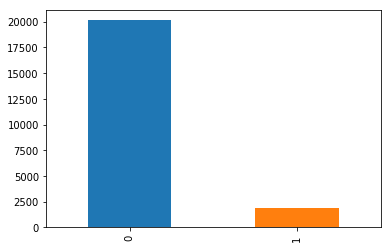

In [292]:
noise_15plot = building_merge4['building_w_noise_15_2'].value_counts().plot(kind='bar')


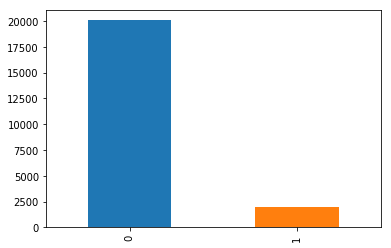

In [286]:
noise_16plot = building_merge4['building_w_noise_16_2'].value_counts().plot(kind='bar')


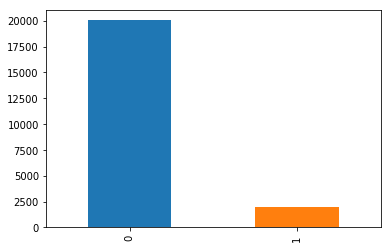

In [287]:
noise_17plot = building_merge4['building_w_noise_17_2'].value_counts().plot(kind='bar')


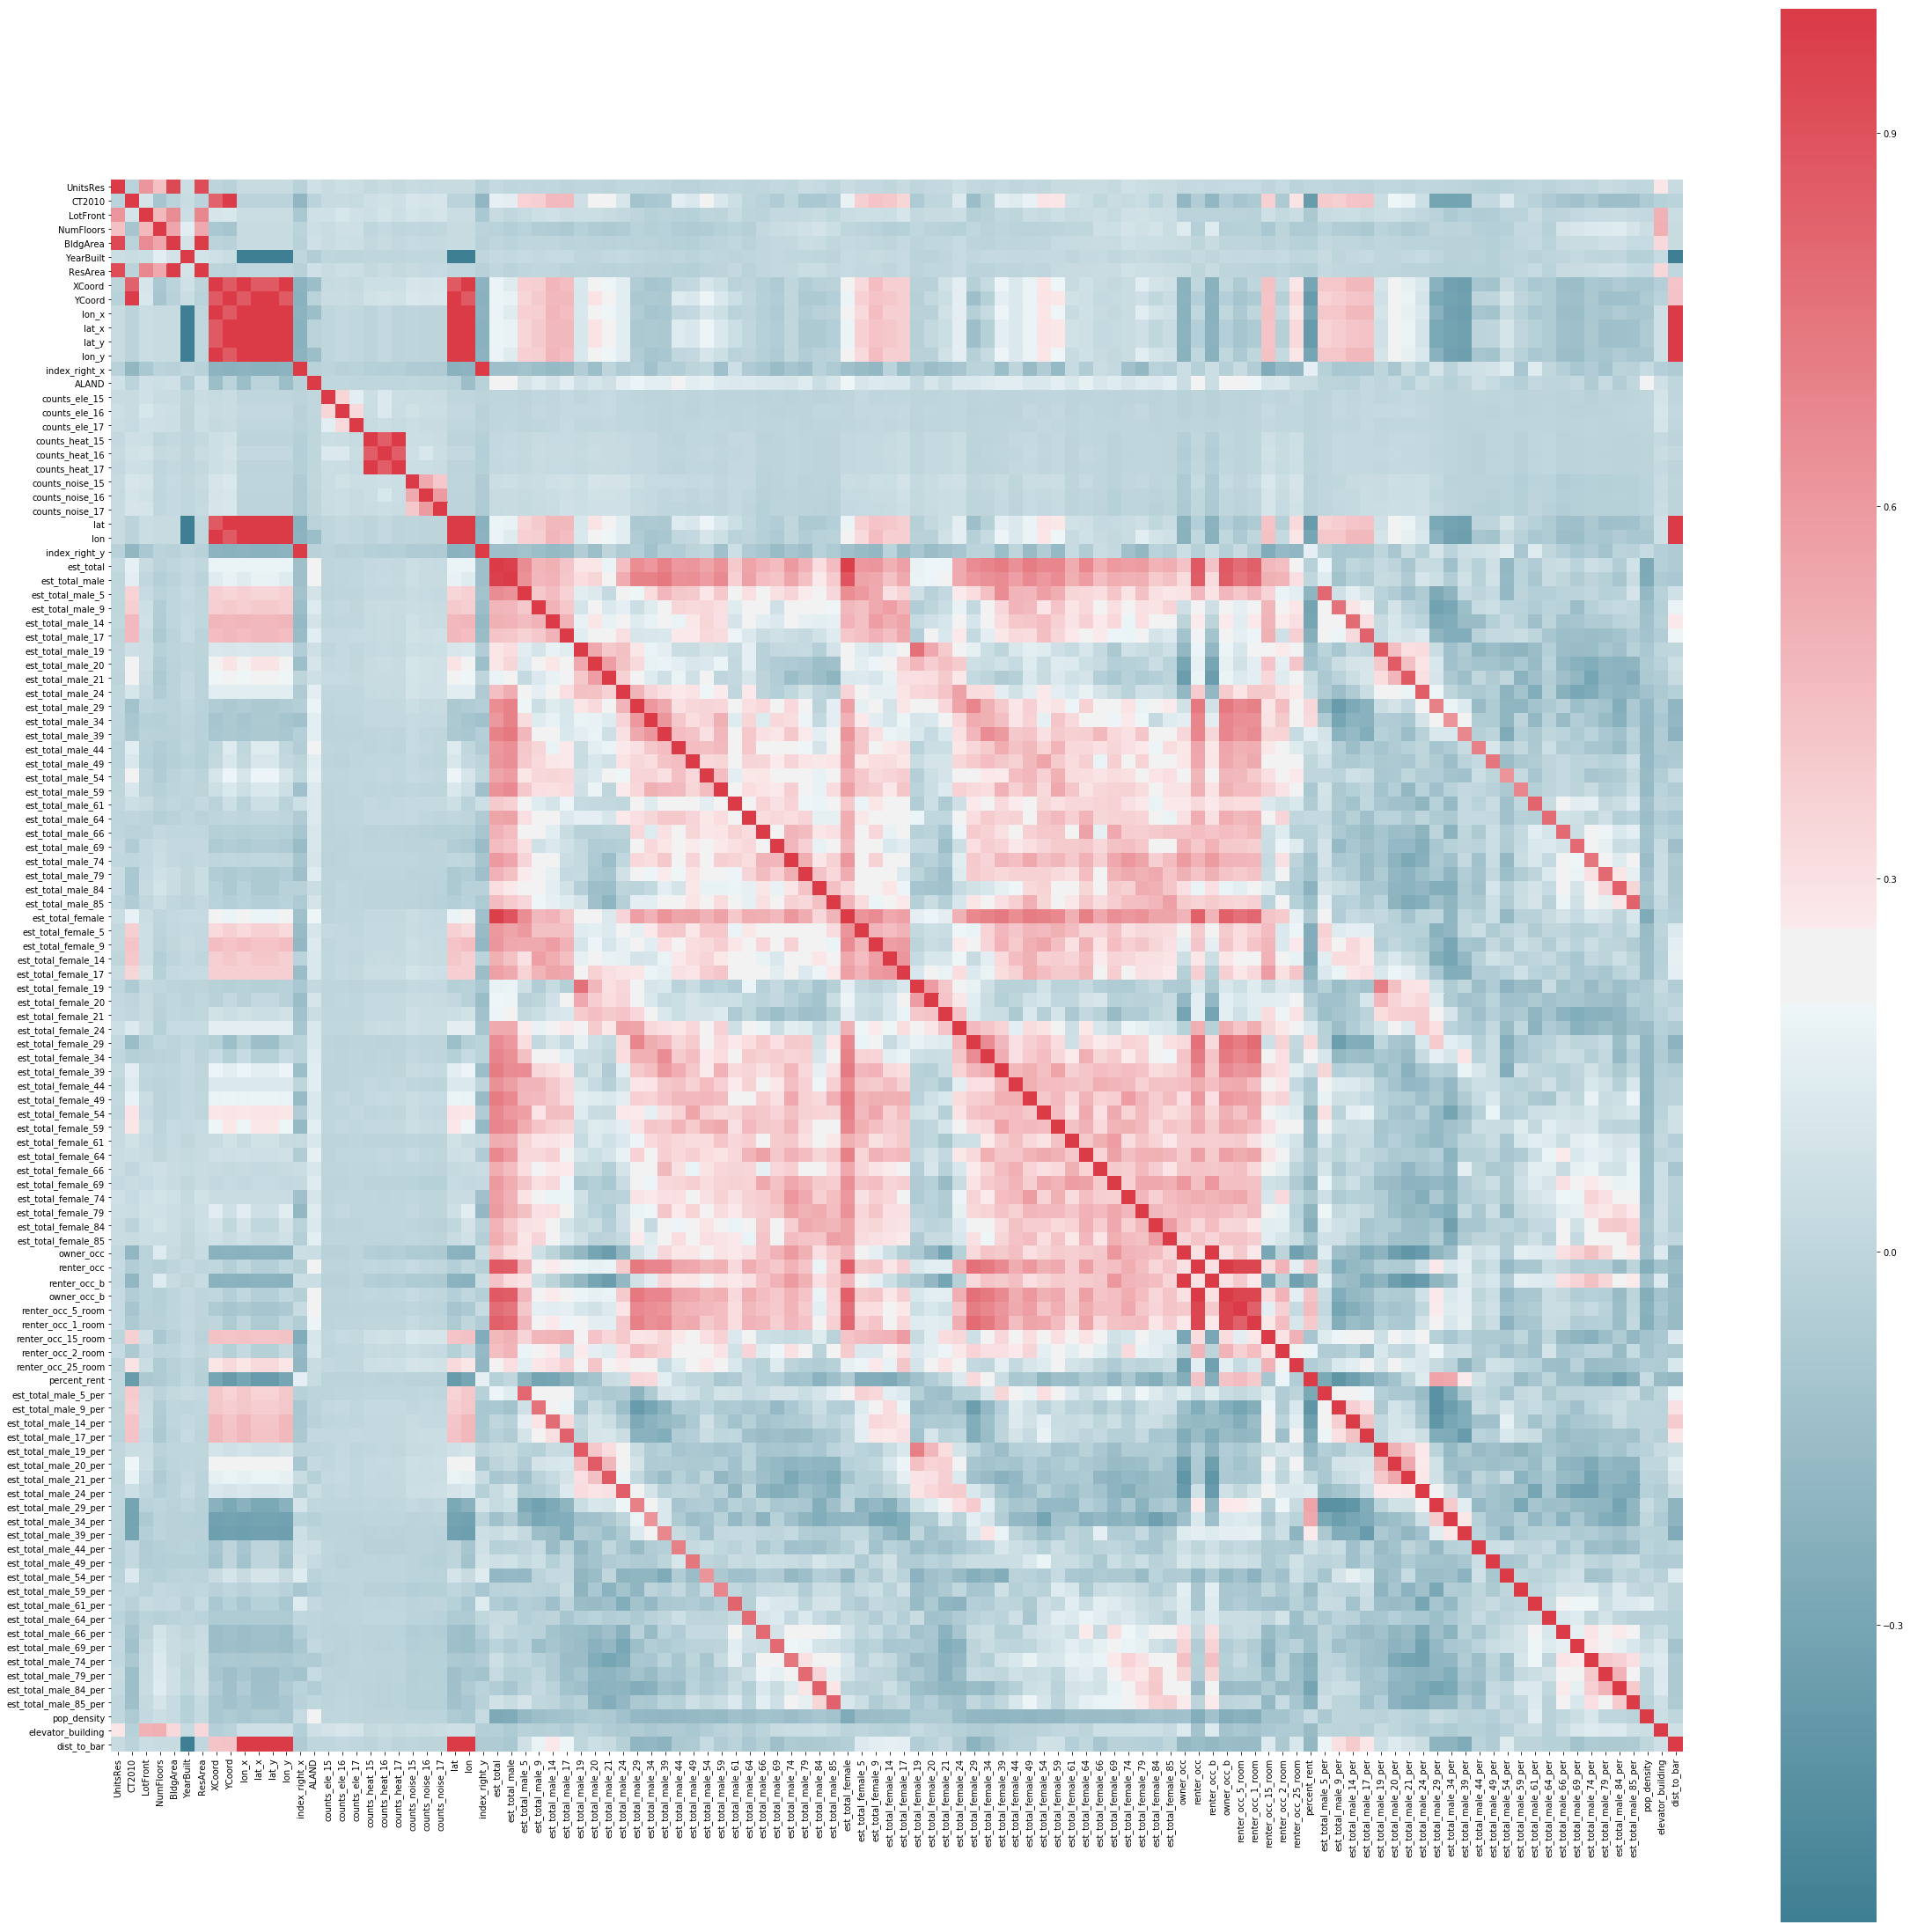

In [308]:
import seaborn as sns

f, ax = plt.subplots(figsize=(40, 40))
corr = building_merge4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [311]:
list(building_merge4.columns.values)


['Address',
 'Borough',
 'UnitsRes',
 'CT2010',
 'OwnerType',
 'OwnerName',
 'LotFront',
 'NumFloors',
 'BldgArea',
 'YearBuilt',
 'ResArea',
 'BldgClass',
 'XCoord',
 'YCoord',
 'lon_x',
 'lat_x',
 'lat_y',
 'lon_y',
 'geometry_x',
 'index_right_x',
 'TRACTCE_x',
 'ALAND',
 'counts_ele_15',
 'counts_ele_16',
 'counts_ele_17',
 'counts_heat_15',
 'counts_heat_16',
 'counts_heat_17',
 'counts_noise_15',
 'counts_noise_16',
 'counts_noise_17',
 'lat',
 'lon',
 'geometry_y',
 'index_right_y',
 'TRACTCE_y',
 'est_total',
 'est_total_male',
 'est_total_male_5',
 'est_total_male_9',
 'est_total_male_14',
 'est_total_male_17',
 'est_total_male_19',
 'est_total_male_20',
 'est_total_male_21',
 'est_total_male_24',
 'est_total_male_29',
 'est_total_male_34',
 'est_total_male_39',
 'est_total_male_44',
 'est_total_male_49',
 'est_total_male_54',
 'est_total_male_59',
 'est_total_male_61',
 'est_total_male_64',
 'est_total_male_66',
 'est_total_male_69',
 'est_total_male_74',
 'est_total_male_79'

In [ ]:
standardized_X = preprocessing.scale(X)

## run a very simple logistic regression

In [55]:

columns = ["noise_voi", "noise_voi_15", "NumFloors", "YearBuilt"]
data_final = pd.DataFrame(merged1516_2, columns=columns)

data_final.columns.values
data_final.head()


,noise_voi,noise_voi_15,NumFloors,YearBuilt
0,0,0,6.0,2005
1,0,0,6.0,2005
2,1,1,6.0,2005
3,1,0,5.0,1920
4,1,1,5.0,1923


In [56]:
data_final.dtypes

noise_voi         int64
noise_voi_15      int64
NumFloors       float64
YearBuilt         int64
dtype: object

In [ ]:
data_final.describe()

In [ ]:
#make years categorical
#set up bins
bin = [-1,1910, 1920, 1940, 1960, 1980, 2000, 2010]
#use pd.cut function can attribute the values into its specific bins
columns = ["YearBuilt"]
data_years = pd.DataFrame(data_final, columns=columns)
print(data_floors.shape)


category = pd.cut(data_floors.YearBuilt,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
year_new = pd.concat([data_years,category],axis = 1)
print(year_new.shape)

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = 'range', data = year_new, palette = 'hls')
plt.show()

year_new.head()
dummy_year = pd.get_dummies(year_new['range'], prefix='year')


In [ ]:
data_final.shape

In [ ]:
#make floors categorical
#set up bins
bin = [-1,5,10,100]
#use pd.cut function can attribute the values into its specific bins
columns = ["NumFloors"]
data_floors = pd.DataFrame(data_final, columns=columns)


category = pd.cut(data_floors.NumFloors,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
floors_new = pd.concat([data_floors,category],axis = 1)

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = 'range', data = floors_new, palette = 'hls')
plt.show()

floors_new.head()
dummy_floor = pd.get_dummies(floors_new['range'], prefix='floor')



In [ ]:
print(dummy_floor.shape)
dummy_floor.head()

In [ ]:
data_final_2 = pd.concat([data_final, dummy_year, dummy_floor], axis=1)
data_final_2.describe(include='all')



In [ ]:
X=data_final_2.loc[:,['noise_voi_15', 'floor_(5, 10]', 'floor_(10, 100]', 'year_(1910, 1920]', 'year_(1920, 1940]',
       'year_(1940, 1960]', 'year_(1960, 1980]', 'year_(1980, 2000]',
       'year_(2000, 2010]']]
y=data_final_2.loc[:,['noise_voi']]

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
preds = logreg.predict_proba(X= pd.DataFrame(X))
preds = pd.DataFrame(preds)
preds.columns = ["no_noise_prob", "noise_prob"]

In [ ]:
preds

In [ ]:
import shapefile  
import folium     

In [ ]:
#create dataset for the map
data_map1 = pd.concat([merged1516_2, preds], axis=1)
print(data_map1.shape)
data_map1.head()



In [ ]:
tax_data_coord = tax_data.loc[:,['XCoord', 'YCoord', 'Address']]
tax_data_coord = tax_data_coord.drop_duplicates(subset=['Address'])

map_data2 = pd.merge(data_map1, tax_data_coord, how='inner',on='Address')
print(map_data2.shape)
map_data2.describe()


import pyproj

long = np.array((map_data2.shape[0],1))
lat = np.array((map_data2.shape[0],1))
coordslist=[]
for i,row in enumerate(map_data2.iterrows()):
    xcoord=row[1]['XCoord']
    ycoord=row[1]['YCoord']
    coordslist.append(NYSP1983(xcoord,ycoord,inverse=True))

    
coords_df = pd.DataFrame(coordslist)

map_data3 = map_data3.rename(index=str, columns={0: "lon", 1: "lat"})


print(coords_df)
map_data3 = pd.concat([map_data2, coords_df], axis=1)
print(map_data3.shape)
map_data3 = map_data3.rename(index=str, columns={0: "lon", 1: "lat"})
map_data3.head()

In [ ]:
import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point


map_data3

In [ ]:
print(coords_df)

In [ ]:
map_data3.iloc[1]['noise_voi']

In [ ]:
#
places = map_data3.loc[:,['lat', 'lon', 'Address']]

#
places["geometry"] = places.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
places.head()
places.crs = {"init": "epsg:4269"}
census = nyc[["TRACTCE", "geometry"]]

#
result = geopandas.tools.sjoin(places, census, how="left")
#

result.head()
#
result.describe(include='all')

In [ ]:
map_nyc = folium.Map(location = [40.7829, -73.9654], zoom_start = 12)
#feature_group = folium.FeatureGroup("Locations")
map_nyc



In [ ]:
marker = folium.features.Marker([40.721179, -73.980050], popup="8.8% predicted probability")
map_nyc.add_child(marker)



In [ ]:
map_nyc.save('/Users/rasmussenrogers/Documents/simple_dot_plot.html')

download tiger lines

In [22]:
states_filename = "tl_2017_us_state.zip"
states_url = f"https://www2.census.gov/geo/tiger/TIGER2017/STATE/{states_filename}"
states_file = pathlib.Path(states_filename)

tract_filename = "tl_2017_36_tract.zip"
tract_url = f"https://www2.census.gov/geo/tiger/TIGER2017/TRACT/{tract_filename}"
tract_file = pathlib.Path(tract_filename)

for data_file, url in zip([states_file, tract_file], [states_url, tract_url]):
    if not data_file.is_file():
        with urllib.request.urlopen(url) as resp, \
                open(data_file, "wb") as f:

            f.write(resp.read())
            
###

states_gdf = gpd.read_file(f"zip://{states_file}")

tract_gdf = gpd.read_file(f"zip://{tract_file}")


#
tract_gdf.head()
#
tract_gdf.crs
#
counties = ['061']
nyc=tract_gdf.loc[tract_gdf['COUNTYFP'].isin(counties)]
nyc.head()
nyc.shape
#
tract_gdf.dtypes
#
tract_gdf.head()
#
nyc.crs
#
nyc.plot()
#
import pandas
import geopandas
import geopandas.tools
from shapely.geometry import Point

#
places = map_data3.loc[:,['lat', 'lon', 'Address']]
#
places["geometry"] = places.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
places.head()
places.crs = {"init": "epsg:4269"}
census = nyc[["TRACTCE", "geometry"]]

#
result = geopandas.tools.sjoin(places, census, how="left")

#

result.head()

#
result.describe(include='all')


## import census data
eg: population density, population by age 

In [ ]:
from census import Census
from us import states
c = Census("a513b11c3aa6b2677d078ad85435114229899fa3")
c.sf1.get('NAME', geo={'for': 'tract:*',
                       'in': 'state:{} county:170'.format(states.AK.fips)})

I am not sure why this example from online works but mine doesnt 
https://python-graph-gallery.com/312-add-markers-on-folium-map/

In [ ]:
# import libraries
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
data
 



In [ ]:
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(map_data3)):
    print(map_data3.iloc[i]['lon'])
    print(map_data3.iloc[i]['lat'])
    print(i)
    folium.Marker([map_data3.iloc[i]['lon'], map_data3.iloc[i]['lat']]).add_to(m)
 
m

In [ ]:
m

In [ ]:
m.save('/Users/rasmussenrogers/Documents/simple_dot_plot2.html')